# Research note

After studied dnu-numax diagram, how about taking a look at mass-radius diagram?


In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("/Users/yali4742/Dropbox (Sydney Uni)/Work/nike")
from lib.histdist import distance_to_edge

rootpath='/Users/yali4742/Dropbox (Sydney Uni)/Work/nike/'

In [11]:
# these are the corrected mass and radius
tnu_samples_obs = np.load(rootpath+"sample/obs/tnu_samples.npy")
mobs, robs = tnu_samples_obs[:,3], tnu_samples_obs[:,4]
tnu_samples_obs = np.load(rootpath+"sample/obs_nc/tnu_samples.npy")
mobs_nc, robs_nc = tnu_samples_obs[:,3], tnu_samples_obs[:,4]
tnu_samples_pdv = np.load(rootpath+"sample/padova/tnu_samples.npy")
mpdv, rpdv = tnu_samples_pdv[:,3], tnu_samples_pdv[:,4]
tnu_samples_pdv = np.load(rootpath+"sample/padova_nc/tnu_samples.npy")
mpdv_nc, rpdv_nc = tnu_samples_pdv[:,3], tnu_samples_pdv[:,4]
# tnu_samples_pdv_os = np.load("sample/padova_oversampling/tnu_samples.npy")
# mpdvos, rpdvos = tnu_samples_pdv_os[:,3], tnu_samples_pdv_os[:,4]
# tnu_samples_pdv_mini = np.load("sample/padova_oversampling_mini/tnu_samples.npy")
# mpdvos_mini, rpdvos_mini = tnu_samples_pdv_mini[:,3], tnu_samples_pdv_mini[:,4]

In [6]:
def edge_analysis(xdata, ydata, filepath, points, title):
    # plot mass-radius diagrams
    fig = plt.figure(figsize=(12,6))
    axes = fig.subplots(nrows=1,ncols=1, squeeze=False).reshape(-1)
    axes[0].axis([0., 4., 5., 20.])

    axes[0].plot(xdata, ydata, "r.", markersize=2)
    axes[0].set_title(title)
    axes[0].grid(which="both")
    axes[0].set_xlabel("mass")
    axes[0].set_ylabel("radius")

    # cubic spline interpolation
    # points
    Npoint = len(points)
    xpoint, ypoint = np.array([points[i][0] for i in range(Npoint)]), np.array([points[i][1] for i in range(Npoint)])
    import scipy.interpolate
    tck = scipy.interpolate.splrep(xpoint, ypoint, s=0)

    # save spline coefficients
    np.save(filepath+"mr_spline_tck", tck)


    # plot knots and edge 
    axes[0].plot(xpoint, ypoint, "k.", markersize=10)
    xedge = np.arange(0.5, 2.3, 0.0005)
    yedge = scipy.interpolate.splev(xedge, tck, der=0)
    Nedge = xedge.shape[0]
    axes[0].plot(xedge, yedge, "k.", ms=0.2) 

    # save edges
    np.save(filepath+"mr_edge_samples", np.array([xedge, yedge]).T)

    # # shortest distance distribution
    def shortest_distance(xdata, ydata, xedge, yedge):
        Ndata, Nedge = xdata.shape[0], xedge.shape[0]
        # if Ndata>10000:
            # minimize memory allocation issue
            # seg = int(Ndata/10000)+1
            # dist = np.array([])
            # for iseg in range(seg):
            #     tNdata = len(xdata[iseg*10000:(iseg+1)*10000])
            #     X = np.zeros((tNdata+Nedge, 2))
            #     X[0:tNdata,0], X[0:tNdata,1] = xdata[iseg*10000:(iseg+1)*10000], ydata[iseg*10000:(iseg+1)*10000]
            #     X[tNdata:,0], X[tNdata:,1] = xedge, yedge
            #     Y = scipy.spatial.distance.pdist(X)
            #     tdist = np.min(scipy.spatial.distance.squareform(Y)[0:tNdata,tNdata:], axis=1)
            #     dist = np.concatenate([dist, tdist])         
        Xa = np.zeros((Ndata, 2))
        Xa[:,0], Xa[:,1] = xdata, ydata
        Xb = np.zeros((Nedge, 2))
        Xb[:,0], Xb[:,1] = xedge, yedge
        Y = scipy.spatial.distance.cdist(Xa, Xb)
        dist = np.min(Y, axis=1) 
        return dist

    dx = distance_to_edge(xdata, ydata, xedge, yedge, tck, diagram="mr", distance="horizontal")
    dy = distance_to_edge(xdata, ydata, xedge, yedge, tck, diagram="mr", distance="vertical")

    # # now plot histograms
    fig = plt.figure(figsize=(12,12))
    axes = fig.subplots(nrows=2,ncols=1)
    axes[0].set_xlim(-2, 4)
    axes[1].set_xlim(-2, 4)
    bins0 = np.linspace(-2, 12, 600)
    bins1 = np.linspace(-2, 12, 600)
    # bins0 = np.linspace(distn.min(), distn.max(), 1500)
    # bins1 = np.linspace(distt.min(), distt.max(), 1500)
    h=axes[0].hist(dx, histtype="step", color="red",
        bins=bins0, zorder=0)
    h=axes[1].hist(dy, histtype="step", color="red",
        bins=bins1, zorder=0)
    axes[0].set_xlabel("Horizontal distance")
    axes[1].set_xlabel("Vertical distance")
    axes[0].set_ylabel("Ncount")
    axes[1].set_ylabel("Ncount")
    axes[0].grid(which="both")
    axes[1].grid(which="both")
    axes[0].set_title(title)
    axes[1].set_title(title)
    return


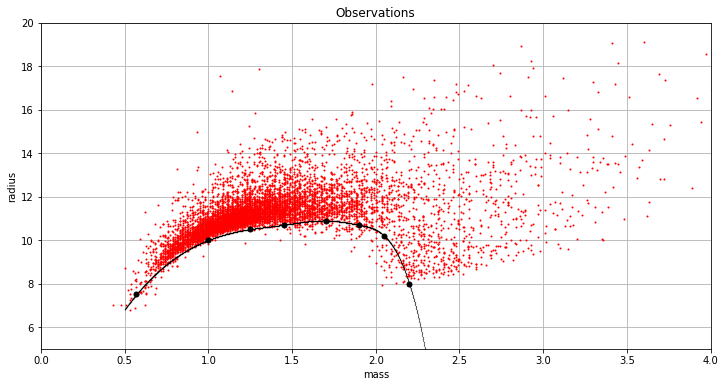

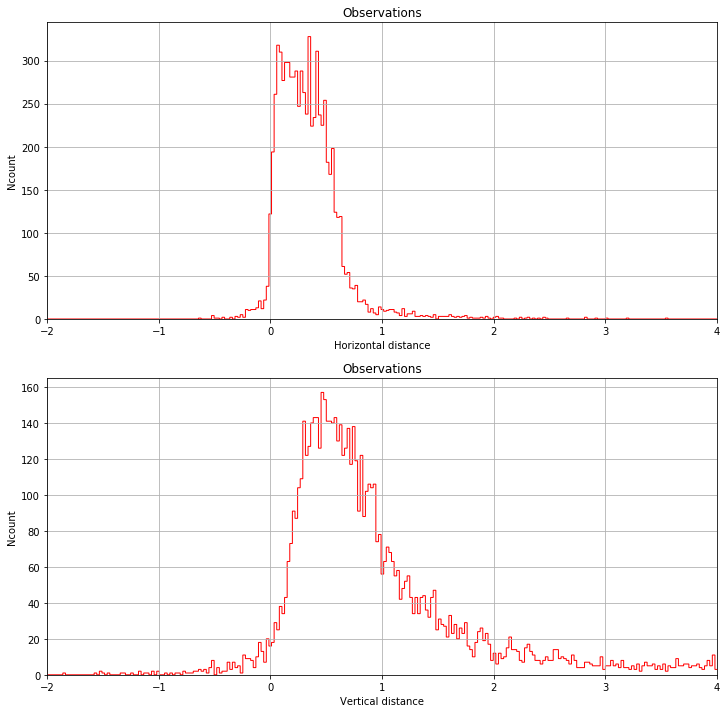

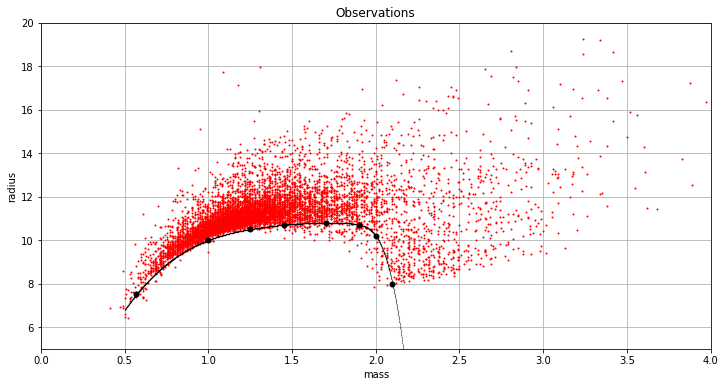

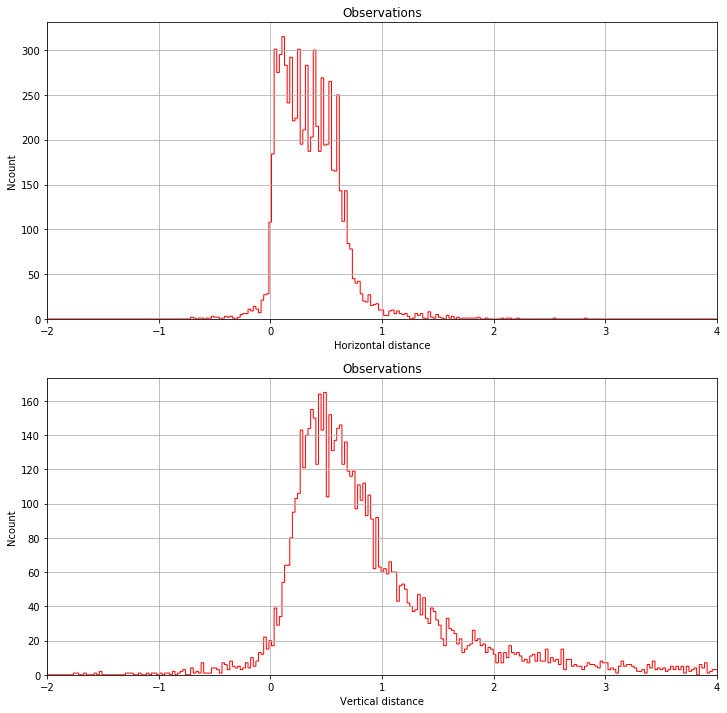

In [29]:
filepath = rootpath+"sample/obs/"
points=[(0.57, 7.5), (1.0, 10.0), (1.25, 10.5), (1.45, 10.7), (1.7, 10.9), (1.9, 10.7), (2.05, 10.2), (2.2, 8.0)]
title = "Observations"
edge_analysis(mobs, robs, filepath, points, title)

filepath = rootpath+"sample/obs_nc/"
points=[(0.57, 7.5), (1.0, 10.0), (1.25, 10.5), (1.45, 10.7), (1.7, 10.8), (1.9, 10.7), (2.0, 10.2), (2.1, 8.0)]
title = "Observations"
edge_analysis(mobs_nc, robs_nc, filepath, points, title)

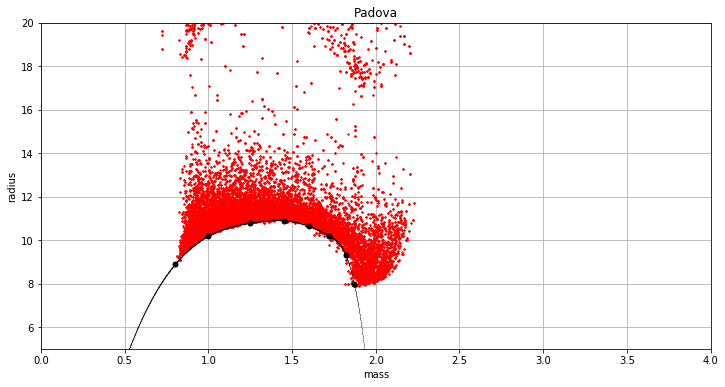

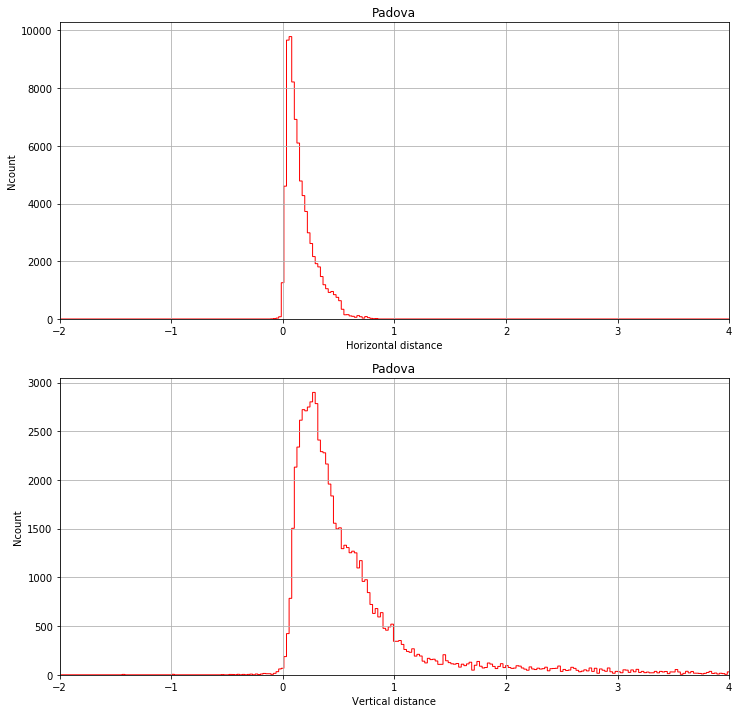

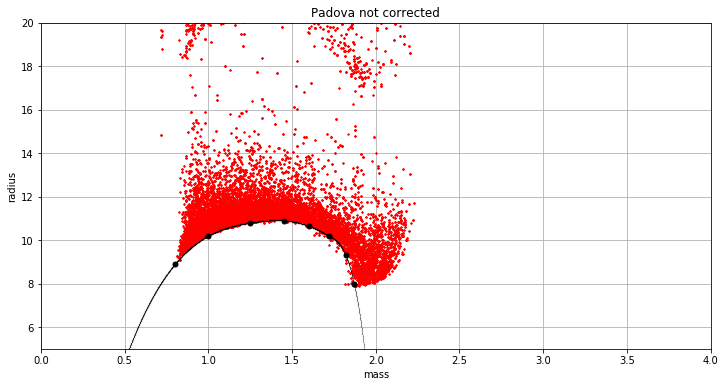

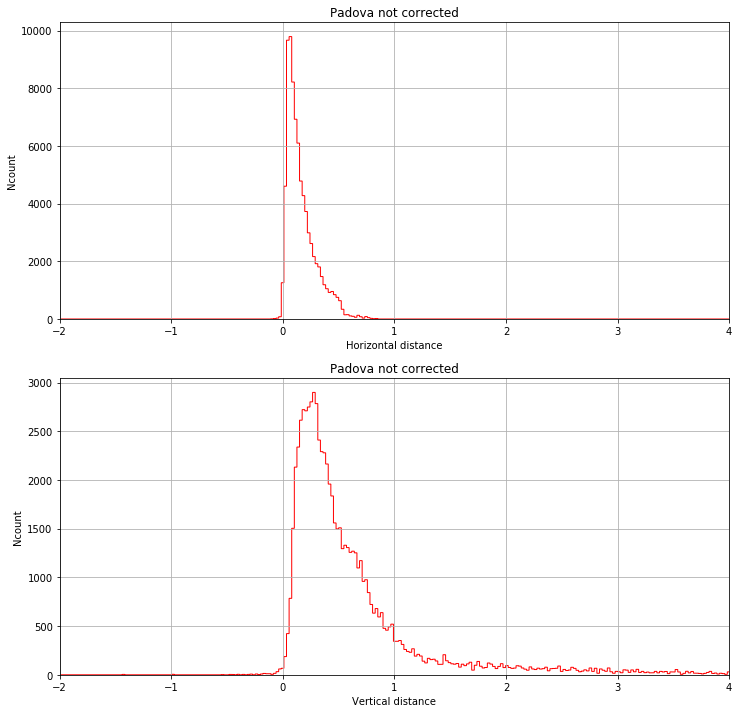

In [33]:
filepath = rootpath+"sample/padova/"
points=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 8.0)]
title = "Padova"
edge_analysis(mpdv, rpdv, filepath, points, title)

filepath = rootpath+"sample/padova_nc/"
points=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 8.0)]
title = "Padova not corrected"
edge_analysis(mpdv_nc, rpdv_nc, filepath, points, title)

In [8]:
# filepath = "sample/padova_oversampling/"
# points=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 8.0)]
# title = "Padova oversampling"
# edge_analysis(mpdvos, rpdvos, filepath, points, title)

In [7]:
# filepath = "sample/padova_oversampling_mini/"
# points=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 8.0)]
# title = "Padova oversampling with mini"
# edge_analysis(mpdvos_mini, rpdvos_mini, filepath, points, title)

# MIST He-ZAMS

In [13]:
# filepath = "sample/grids/mist/"
# files = ["00"+"{:0.0f}".format(i).zfill(2)+"000M.track.eep" for i in range(8,31)]
# mass, radius = [np.zeros(len(files)) for i in range(2)]
# for file in files:
    